Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 199, 199, 32)      160       
                                                                 
 activation (Activation)     (None, 199, 199, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 66, 66, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 65, 65, 64)        8256      
                                                                 
 activation_1 (Activation)   (None, 65, 65, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 21, 21, 64)       0         
 2D)                                                    

INFO:tensorflow:Assets written to: model_name.model\assets


INFO:tensorflow:Assets written to: model_name.model\assets


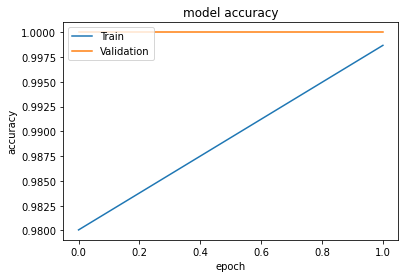

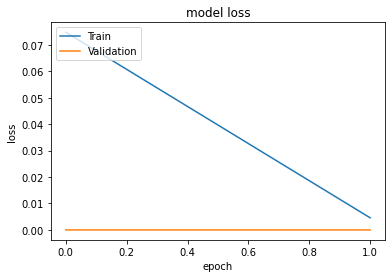

In [1]:
import time
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, InputLayer

from keras.preprocessing.image import ImageDataGenerator
import cv2

import pickle
import numpy as np
#loading the pickle file's from the first step
x = pickle.load(open("x.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

x = x/255.0

#CNN
model = Sequential() 


model.add(Conv2D(32,(2,2), input_shape=x.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(64,(2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(128 ,(2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))


model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(37))
model.add(Activation('softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=1e-7)
model.compile(loss="sparse_categorical_crossentropy",
                        optimizer='adam',
                        metrics=['accuracy']) 
model.summary()

history=model.fit(x,y, batch_size=5, epochs=2, validation_split=0.1)
#trained models are saved in this model
model.save('model_name.model')

import matplotlib.pyplot as plt

# summarizing history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarizing  history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()